In [1]:
import pandas as pd
import ast

In [2]:
df=pd.read_csv('dataset/SEntFiN-v1.1.csv')

# Convert 'Decisions' column from strings to dictionaries
df['Decisions'] = df['Decisions'].apply(ast.literal_eval)
# Normalize the 'Decisions' column
decisions_df = df['Decisions'].apply(pd.Series)

# Concatenate the original DataFrame with the normalized decisions
df_expanded = pd.concat([df.drop(columns='Decisions'), decisions_df], axis=1)

# Melt the expanded DataFrame to long format
df_long = df_expanded.melt(
    id_vars=["S No.", "Title", "Words"],
    var_name="Aspect",
    value_name="Sentiment"
).dropna(subset=["Sentiment"])
df_long

,S No.,Title,Words,Aspect,Sentiment
0,1,SpiceJet to issue 6.4 crore warrants to promoters,8,SpiceJet,neutral
82,83,SpiceJet makes top-level changes,4,SpiceJet,neutral
1509,1510,Maran makes open offer for SpiceJet,6,SpiceJet,positive
1511,1512,"SpiceJet is a buy: CK Narayan, Sharyans Resources",8,SpiceJet,positive
1513,1514,SpiceJet: Regional focus can help airline soar...,8,SpiceJet,positive
...,...,...,...,...,...
45926038,10729,"German shares outperform on Metro, Deutsche Bank",7,Metro,positive
45936795,10733,"Masoor, gram prices weaken on sluggish demand",7,"Masoor, gram",negative
45947561,10746,European shares dip early; Wincor sinks,6,Wincor,negative
45958315,10747,"Gram, masoor decline on subdued demand",6,masoor,negative


In [6]:
docs = df.Title.tolist()

## Using Bertopic

In [5]:
from bertopic import BERTopic
from tqdm import tqdm

e:\PROJECT\Python-Pro\absa-financial-news\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
docs = df.Title.tolist()

topic_model = BERTopic()
topics, probs = topic_model.fit_transform(docs)

In [ ]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,3274,-1_profit_net_to_in,"[profit, net, to, in, stock, up, rs, on, stake...",[Jaypee Group stocks rally over 12% on power p...
1,0,373,0_appoints_ceo_director_chairman,"[appoints, ceo, director, chairman, as, md, ap...",[Tata Power appoints Ashok S Sethi as Executiv...
2,1,365,1_sebi_norms_sat_case,"[sebi, norms, sat, case, against, sebis, sahar...",[SAT upholds Sebi order in Aditya Internationa...
3,2,342,2_sensex_points_top_nifty,"[sensex, points, top, nifty, rangebound, focus...","[Sensex in a range; top stocks in focus, Sense..."
4,3,307,3_net_profit_crore_rs,"[net, profit, crore, rs, q4, q2, at, q1, q3, c...","[SBI Q3 profit down 10 per cent at Rs 3,354.94..."
...,...,...,...,...,...
163,162,11,162_jeera_futures_demand_export,"[jeera, futures, demand, export, spot, stir, 0...",[Jeera futures edge higher 3.20% on export dem...
164,163,11,163_tyres_apollo_tyre_22794,"[tyres, apollo, tyre, 22794, 3736, hungary, 66...",[Apollo Tyres scrip down over 2% on profit-boo...
165,164,11,164_iv_quantum_subramaniam_subramanium,"[iv, quantum, subramaniam, subramanium, amc, w...",[Better to stay away from metals space until S...
166,165,11,165_tea_production_milk_prices,"[tea, production, milk, prices, 1535, 9664, er...",[Tea prices are likely to rally: Vijay Bhambwa...


In [ ]:
topic_model.get_topic(0)

[('appoints', 0.057931523021920193),
 ('ceo', 0.04321831740737256),
 ('director', 0.039464306297517765),
 ('chairman', 0.031229466429216424),
 ('as', 0.031217622045864254),
 ('md', 0.03087354040500021),
 ('appointed', 0.030139157276406113),
 ('head', 0.0294138643082667),
 ('managing', 0.026849884016896808),
 ('quits', 0.024562757498274603)]

In [ ]:
topic_model.get_document_info(docs)

,Document,Topic,Name,Representation,Representative_Docs,Top_n_words,Probability,Representative_document
0,SpiceJet to issue 6.4 crore warrants to promoters,25,25_spicejet_jet_airways_aviation,"[spicejet, jet, airways, aviation, airline, in...","[Jet Airways, SpiceJet surge after fuel price ...",spicejet - jet - airways - aviation - airline ...,1.000000,False
1,MMTC Q2 net loss at Rs 10.4 crore,10,10_loss_widens_narrows_posts,"[loss, widens, narrows, posts, gmr, crore, rep...",[Lanco Infratech Q3 loss widens to Rs 616.6 cr...,loss - widens - narrows - posts - gmr - crore ...,1.000000,False
2,"Mid-cap funds can deliver more, stay put: Experts",12,12_midcaps_midcap_small_smallcap,"[midcaps, midcap, small, smallcap, caps, large...","[Small, midcap stocks to offer enough trading ...",midcaps - midcap - small - smallcap - caps - l...,0.560452,False
3,Mid caps now turn into market darlings,12,12_midcaps_midcap_small_smallcap,"[midcaps, midcap, small, smallcap, caps, large...","[Small, midcap stocks to offer enough trading ...",midcaps - midcap - small - smallcap - caps - l...,0.587374,False
4,"Market seeing patience, if not conviction: Pra...",28,28_avinnash_gorakssakar_jani_hemang,"[avinnash, gorakssakar, jani, hemang, upside, ...","[Little cautious on ABB: Avinnash Gorakssakar,...",avinnash - gorakssakar - jani - hemang - upsid...,0.692240,False
...,...,...,...,...,...,...,...,...
10748,"Negative on Chambal, Advanta: Mitesh Thacker",-1,-1_profit_net_to_in,"[profit, net, to, in, stock, up, rs, on, stake...",[Jaypee Group stocks rally over 12% on power p...,profit - net - to - in - stock - up - rs - on ...,0.000000,False
10749,"Small, Mid-cap stocks may emerge outperformers",12,12_midcaps_midcap_small_smallcap,"[midcaps, midcap, small, smallcap, caps, large...","[Small, midcap stocks to offer enough trading ...",midcaps - midcap - small - smallcap - caps - l...,0.888075,False
10750,Rupee slips against US dollar,8,8_rupee_paise_dollar_against,"[rupee, paise, dollar, against, us, vs, export...",[Rupee falls 8 paise against dollar in early t...,rupee - paise - dollar - against - us - vs - e...,0.900271,True
10751,Rupee weak against US dollar,8,8_rupee_paise_dollar_against,"[rupee, paise, dollar, against, us, vs, export...",[Rupee falls 8 paise against dollar in early t...,rupee - paise - dollar - against - us - vs - e...,1.000000,True


In [ ]:
# from sentence_transformers import SentenceTransformer
# from sklearn.cluster import AgglomerativeClustering

# # Menggunakan model BERT pre-trained
# model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# # Mengubah aspek menjadi vektor embedding
# embeddings = model.encode(unique_aspects)

# # Melakukan clustering dengan Agglomerative Clustering
# clustering_model = AgglomerativeClustering(n_clusters=None, distance_threshold=1.5)
# clustering_model.fit(embeddings)

# # Menambahkan hasil clustering ke DataFrame
# aspect_to_cluster = dict(zip(unique_aspects, clustering_model.labels_))
# df_absa['Cluster'] = df_absa['Aspect'].map(aspect_to_cluster)
# print(df_absa[['Aspect', 'Cluster']].head())

# # Menampilkan aspek-aspek yang ada di setiap cluster
# for cluster in range(clustering_model.n_clusters_):
#     print(f"\nCluster {cluster}:")
#     print(df_absa[df_absa['Cluster'] == cluster]['Aspect'].unique())


## Using LDA

In [7]:
import gensim
#Create Bigram & Trigram Models 
from gensim.models import Phrases
# Add bigrams and trigrams to docs,minimum count 10 means only that appear 10 times or more.
bigram = Phrases(docs, min_count=10)
trigram = Phrases(bigram[docs])
for idx in range(len(docs)):
    for token in bigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)
    for token in trigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token) #Kode di atas membaca file Excel bernama “Text_Preprocessing.xlsx” menggunakan fungsi `pd.ExcelFile()` dari pustaka pandas dan menyimpannya dalam variabel `fo`.

In [14]:
from gensim import corpora, models
from nltk import word_tokenize

# Tokenisasi ulasan
tokenized_ulasan = [word_tokenize(review) for review in docs]

# Create a dictionary representation of the documents.
dictionary = corpora.Dictionary(tokenized_ulasan)
dictionary.filter_extremes(no_below=5, no_above=0.2) 
#no_below (int, optional) – Keep tokens which are contained in at least no_below documents.
#no_above (float, optional) – Keep tokens which are contained in no more than no_above documents (fraction of total corpus size, not an absolute number).
print(dictionary)

Dictionary<3090 unique tokens: ['SpiceJet', 'crore', 'issue', 'promoters', 'MMTC']...>


In [16]:
#https://radimrehurek.com/gensim/tut1.html 
#build corpus
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in tokenized_ulasan]
#The function doc2bow converts document (a list of words) into the bag-of-words format
'''The function doc2bow() simply counts the number of occurrences of each distinct word, 
converts the word to its integer word id and returns the result as a sparse vector. 
The sparse vector [(0, 1), (1, 1)] therefore reads: in the document “Human computer interaction”, 
the words computer (id 0) and human (id 1) appear once; 
the other ten dictionary words appear (implicitly) zero times.'''
print(len(doc_term_matrix))
print(doc_term_matrix[100])
tfidf = models.TfidfModel(doc_term_matrix) #build TF-IDF model
corpus_tfidf = tfidf[doc_term_matrix]

10753
[(172, 1), (362, 1), (363, 1), (364, 1)]


In [17]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array
#function to compute coherence values
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, iterations=100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        
    return model_list, coherence_values

Matplotlib is building the font cache; this may take a moment.


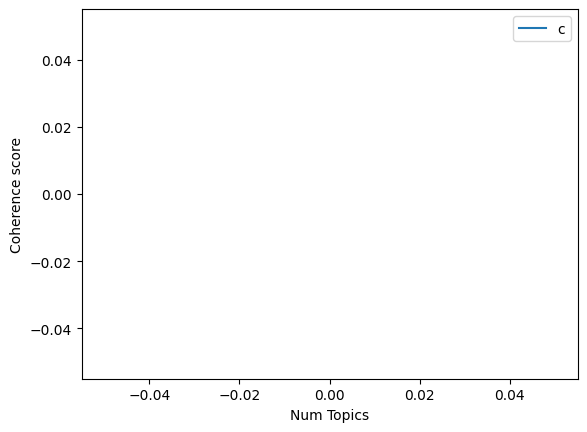

In [20]:
start=1
limit=21
step=1
model_list, coherence_values = compute_coherence_values(dictionary, corpus=corpus_tfidf, 
                                                        texts=docs, start=start, limit=limit, step=step)
#show graphs
import matplotlib.pyplot as plt
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [21]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 6))

model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=3) #num topic menyesuaikan hasil dari coherence value paling tinggi
for idx, topic in model.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic)) 

Num Topics = 1  has Coherence Value of nan
Num Topics = 2  has Coherence Value of nan
Num Topics = 3  has Coherence Value of nan
Num Topics = 4  has Coherence Value of nan
Num Topics = 5  has Coherence Value of nan
Num Topics = 6  has Coherence Value of nan
Num Topics = 7  has Coherence Value of nan
Num Topics = 8  has Coherence Value of nan
Num Topics = 9  has Coherence Value of nan
Num Topics = 10  has Coherence Value of nan
Num Topics = 11  has Coherence Value of nan
Num Topics = 12  has Coherence Value of nan
Num Topics = 13  has Coherence Value of nan
Num Topics = 14  has Coherence Value of nan
Num Topics = 15  has Coherence Value of nan
Num Topics = 16  has Coherence Value of nan
Num Topics = 17  has Coherence Value of nan
Num Topics = 18  has Coherence Value of nan
Num Topics = 19  has Coherence Value of nan
Num Topics = 20  has Coherence Value of nan
Topic: 0 Word: 0.007*"demand" + 0.007*"stocks" + 0.006*";" + 0.006*"in" + 0.006*"oil" + 0.006*"Nifty" + 0.006*"shares" + 0.005*"o

In [22]:
# Word Count of Topic Keywords

from collections import Counter
topics = model.show_topics(formatted=False)
data_flat = [w for w_list in docs for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df_imp_wcount = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count']) 
print(df_imp_wcount)

      word  topic_id  importance  word_count
0   demand         0    0.006978           0
1   stocks         0    0.006815           0
2        ;         0    0.006427        1085
3       in         0    0.006091           0
4      oil         0    0.005968           0
5    Nifty         0    0.005915           0
6   shares         0    0.005634           0
7       of         0    0.005386           0
8       as         0    0.005192           0
9      low         0    0.005164           0
10       ;         1    0.008378        1085
11      in         1    0.007953           0
12  stocks         1    0.007265           0
13  Sensex         1    0.006798           0
14     top         1    0.005866           0
15      as         1    0.005832           0
16      of         1    0.005785           0
17     for         1    0.005248           0
18     and         1    0.004844           0
19       %         1    0.004532        1485
20      Rs         2    0.010222           0
21     net

In [23]:
#Dominant topic and its percentage contribution in each topic
def format_topics_sentences(ldamodel=None, corpus=doc_term_matrix, texts=docs):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [27]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=model, corpus=doc_term_matrix, texts=docs)

# Format
# df_dominant_topic = df_topic_sents_keywords.reset_index()
# df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
# print(df_dominant_topic.head(10))

AttributeError: 'DataFrame' object has no attribute 'append'